<a href="https://colab.research.google.com/github/mariaeduardacarpejani/Pre_Processamento/blob/main/Encoders%2C_Sele%C3%A7%C3%A3o_de_Atributos_e_Detec%C3%A7%C3%A3o_de_Outliers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185331 sha256=3eee2306f5bfb58491e916968ef25be8c7af21b2e21b3a637e5b784023288e0a
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from pyod.models.knn import KNN

In [ ]:
df = pd.read_csv('/content/credit_card_clients (1).csv', header = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
# Seleciona os valores das colunas de 0 a 13 do DataFrame e os armazena em x_credit_card
x_credit_card = df.iloc[:, 0:14].values
x_credit_card

array([[     1,  20000,      2, ...,     -2,   3913,   3102],
       [     2, 120000,      2, ...,      2,   2682,   1725],
       [     3,  90000,      2, ...,      0,  29239,  14027],
       ...,
       [ 29998,  30000,      1, ...,      0,   3565,   3356],
       [ 29999,  80000,      1, ...,     -1,  -1645,  78379],
       [ 30000,  50000,      1, ...,      0,  47929,  48905]])

In [ ]:
# Seleciona a segunda coluna do array x_credit_card
x_credit_card[:, 1]

array([ 20000, 120000,  90000, ...,  30000,  80000,  50000])

In [ ]:
# Aplica o LabelEncoder para transformar os valores da segunda coluna do array x_credit_card em valores numéricos
teste = label_encoder_teste.fit_transform(x_credit_card[:, 1])
teste

array([ 2, 12,  9, ...,  3,  8,  5])

In [ ]:
# Cria um objeto LabelEncoder para codificar a variável workclass
label_encoder_workclass = LabelEncoder()
# Cria um objeto LabelEncoder para codificar a variável education
label_encoder_education = LabelEncoder()

In [ ]:
# Aplica o LabelEncoder para transformar os valores da segunda coluna do array x_credit_card em valores numéricos
x_credit_card[:, 1] = label_encoder_workclass.fit_transform(x_credit_card[:, 1])
# Acessa novamente a segunda coluna do array x_credit_card após a transformação
x_credit_card[:, 1]

array([ 2, 12,  9, ...,  3,  8,  5])

In [ ]:
# Aplica o LabelEncoder para transformar os valores da quarta coluna do array x_credit_card em valores numéricos
x_credit_card[:, 3] = label_encoder_education.fit_transform(x_credit_card[:, 3])
# Acessa novamente a quarta coluna do array x_credit_card após a transformação
x_credit_card[:, 3]

array([2, 2, 2, ..., 2, 3, 2])

In [ ]:
# Cria um objeto ColumnTransformer para aplicar a codificação one-hot nas colunas especificadas
onehotecoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder = 'passthrough')

In [ ]:
# Aplica a transformação de codificação one-hot nas colunas especificadas do array x_credit_card
# O resultado é convertido para uma matriz NumPy usando o método toarray()
x_credit_card = onehotecoder_census.fit_transform(x_credit_card).toarray()

In [ ]:
# Obtém a forma (shape) do array x_credit_card
x_credit_card.shape

(30000, 22540)

# **Seleção de Atributos**

In [ ]:
# Calcula a variância da primeira coluna do array x_credit_card
x_credit_card[:,0].var()

0.016163278888888886

In [ ]:
# Cria um objeto VarianceThreshold para selecionar recursos com variância acima de 0.05
selecao = VarianceThreshold(threshold=0.05)

In [ ]:
# Aplica a seleção de recursos com base na variância no array x_credit_card
x_credit_variancia = selecao.fit_transform(x_credit_card)
# Aplica a seleção de recursos com base na variância no array x_credit_card
x_credit_variancia

array([[ 1.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.0000e+00,
        -2.0000e+00,  3.9130e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         2.0000e+00,  2.6820e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  2.9239e+04],
       ...,
       [ 0.0000e+00,  1.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  3.5650e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
        -1.0000e+00, -1.6450e+03],
       [ 0.0000e+00,  0.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  4.7929e+04]])

In [ ]:
# Encontra os índices dos recursos (colunas) com variância acima de 0.05
indices = np.where(selecao.variances_ > 0.05)
# Atribui os índices encontrados a variável indices
indices

(array([    2,     3,     5,    82,    83,    84,    96,   144,   145,
          146,   147,   148,   155,   156,   157,   159,   166,   167,
          168,   170,   177,   178,   179,   181,   535, 22534, 22535,
        22536, 22537, 22538, 22539]),)

In [ ]:
# Extrai os valores das colunas de índice 0 a 13 do DataFrame df e armazena em x_credit_card
x_credit_card = df.iloc[:, 0:14].values
# Atribui os valores extraídos a x_credit_card
x_credit_card

array([[    1,     2,     2, ...,    -2,  3913,  3102],
       [    2,    12,     2, ...,     2,  2682,  1725],
       [    3,     9,     2, ...,     0, 29239, 14027],
       ...,
       [29998,     3,     1, ...,     0,  3565,  3356],
       [29999,     8,     1, ...,    -1, -1645, 78379],
       [30000,     5,     1, ...,     0, 47929, 48905]])

In [ ]:
# Extrai os valores da coluna de índice 14 do DataFrame df e armazena em y_credit_card
y_credit_card = df.iloc[:, 14].values
# Atribui os valores extraídos a y_credit_card
y_credit_card

array([  689,  2682, 13559, ...,  2758, 76304, 49764])

In [ ]:
# Cria um objeto StandardScaler para realizar a padronização dos dados
scaler_credit = StandardScaler()

In [ ]:
# Obtém a forma (shape) do array x_credit_card
x_credit_card.shape

(30000, 14)

In [ ]:
# Cria um objeto ExtraTreesClassifier para seleção de recursos
selecao  = ExtraTreesClassifier()
# Ajusta o modelo aos dados de entrada x_credit_card e rótulos y_credit_card
selecao.fit(x_credit_card, y_credit_card)

# Processamento






In [ ]:
# Extrai os valores das colunas de índice 0 e 13 do DataFrame df e armazena em x_credit
x_credit = df.iloc[:, [0,13]].values
x_credit

array([[    1,  3102],
       [    2,  1725],
       [    3, 14027],
       ...,
       [29998,  3356],
       [29999, 78379],
       [30000, 48905]])

In [ ]:
# Cria um objeto StandardScaler para realizar a padronização dos dados
scaler_credit= StandardScaler()
# Aplica o scaler aos dados do DataFrame df e armazena o resultado em base_credit
base_credit= scaler_credit.fit_transform(df)

In [ ]:
# Cria uma lista vazia para armazenar os valores do WCSS (Within-Cluster Sum of Squares)
wcss= []
# Itera de 1 a 10 para testar diferentes números de clusters
for i in range(1,11):
   # Cria um objeto KMeans com o número de clusters atual (i)
  kmeans_credit = KMeans(n_clusters = i, random_state = 0)
  # Ajusta o modelo aos dados do DataFrame df
  kmeans_credit.fit(df)
  # Calcula e armazena o valor do WCSS para o modelo atual
  wcss.append(kmeans_credit.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Cria um objeto KMeans com 3 clusters
kmeans_credit = KMeans(n_clusters = 3)
# Ajusta o modelo aos dados do DataFrame df
kmeans_credit.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Obtém os centroides dos clusters encontrados pelo modelo K-Means
centroides = kmeans_credit.cluster_centers_
# Atribui os centroides a uma variável chamada centroides
centroides

array([[ 1.52115559e+04,  3.07320365e+05,  1.63404255e+00,
         1.59610942e+00,  1.47841945e+00,  3.69534347e+01,
        -6.11063830e-01, -8.46443769e-01, -8.52765957e-01,
        -8.65896657e-01, -8.73799392e-01, -8.87902736e-01,
         2.03066811e+04,  1.81828867e+04,  1.76694106e+04,
         1.73825363e+04,  1.70790214e+04,  1.69606542e+04,
         6.64966492e+03,  7.22522736e+03,  6.99127076e+03,
         6.62329240e+03,  6.69484158e+03,  7.74876182e+03,
         1.41155015e-01],
       [ 1.55445821e+04,  2.73546877e+05,  1.57636809e+00,
         1.82630003e+00,  1.51102641e+00,  3.68570651e+01,
         2.98121427e-01,  2.74435067e-01,  2.40947454e-01,
         1.95752791e-01,  1.64715491e-01,  1.62809692e-01,
         2.03211723e+05,  1.98952442e+05,  1.92903918e+05,
         1.78178992e+05,  1.65437504e+05,  1.58119218e+05,
         1.42972488e+04,  1.55679284e+04,  1.24041557e+04,
         1.09582494e+04,  1.10123420e+04,  1.18129850e+04,
         1.93574735e-01],
    

In [ ]:
# Aplica a transformação inversa para obter os centroides no espaço original
scaler_credit.inverse_transform(kmeans_credit.cluster_centers_)
# Obtém os rótulos dos clusters para cada amostra
rotulos = kmeans_credit.labels_
rotulos
# Cria um gráfico de dispersão dos dados e dos centroides dos clusters
graph1 = px.scatter(x = x_credit[:, 0], y= x_credit[:, 1], color = rotulos)
graph2 = px.scatter(x = centroides[:, 0], y = centroides[:, 1], size = [15, 15, 15])
graph3 = go.Figure(data = graph1.data + graph2.data)
graph3.show()

Text(0, 0.5, 'Distancia')

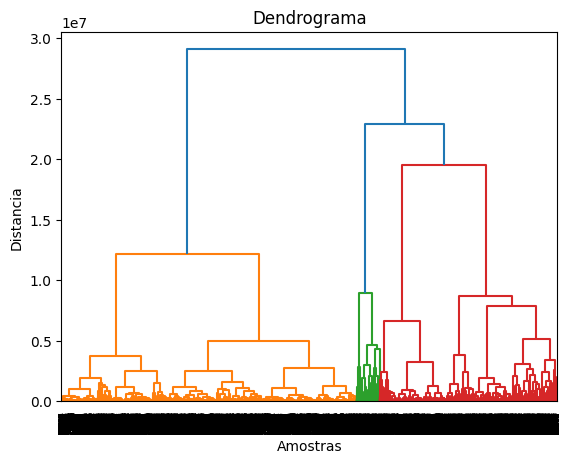

In [ ]:
#Descritiva
# Cria um objeto AgglomerativeClustering para realizar a clusterização hierárquica
hc_credit = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
# Obtém os rótulos dos clusters para cada amostra usando a clusterização hierárquica
rotulos_hc = hc_credit.fit_predict(df)
# Exibe os rótulos dos clusters
rotulos_hc
# Gera o dendrograma usando a função dendrogram do scipy
dendrograma = dendrogram(linkage(df, method = 'ward'))
# Define o título, rótulos dos eixos do dendrograma
plt.title('Dendrograma')
plt.xlabel('Amostras')
plt.ylabel('Distancia')

#PYOD

In [ ]:
# Remove linhas com valores ausentes do DataFrame
df.dropna(inplace=True)
# Cria um objeto KNN para detecção de valores ausentes
detector = KNN()
# Ajusta o modelo aos dados do DataFrame, considerando apenas as colunas 1 a 3
detector.fit(df.iloc[:, 1:4])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
# Obtém as previsões de valores ausentes do modelo KNN
previsoes = detector.labels_
# Exibe as previsões de valores ausentes
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Obtém a confiança das previsões de valores ausentes do modelo KNN
confianca_previsoes = detector.decision_scores_
# Exibe a confiança das previsões de valores ausentes
confianca_previsoes

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Cria uma lista para armazenar os índices dos outliers
outliers = []
# Itera sobre as previsões
for i in range(len(previsoes)):
  # Verifica se a amostra foi considerada um outlier (previsão igual a 1)
  if previsoes[i] == 1:
     # Adiciona o índice do outlier à lista
    outliers.append(i)

In [ ]:
# Imprime os índices dos outliers
print(outliers)

[12, 80, 358, 385, 433, 448, 451, 502, 504, 527, 555, 737, 811, 1073, 1095, 1157, 1231, 1282, 1347, 1366, 1369, 1490, 1508, 1831, 1856, 1904, 1992, 2065, 2145, 2197, 2222, 2249, 2343, 2351, 2514, 2527, 2593, 2598, 2607, 2609, 2669, 3051, 3217, 3226, 3258, 3314, 3402, 3405, 3501, 3519, 3602, 3615, 3667, 3689, 3733, 3760, 3764, 3769, 3788, 3896, 3989, 4033, 4099, 4251, 4287, 4417, 4469, 4575, 4603, 4665, 4703, 4743, 4754, 4859, 4911, 5092, 5106, 5214, 5270, 5333, 5408, 5476, 5479, 5625, 5632, 5707, 5747, 5808, 5878, 5945, 5980, 6079, 6205, 6468, 6484, 6528, 6587, 6637, 6652, 6713, 6722, 6781, 6866, 6868, 6876, 6912, 6955, 6994, 7103, 7312, 7335, 7362, 7405, 7676, 7702, 7797, 7891, 8023, 8103, 8282, 8448, 8596, 8662, 8677, 8880, 9008, 9138, 9145, 9161, 9283, 9311, 9503, 9555, 9588, 9683, 9708, 9723, 9738, 9825, 9914, 10057, 10089, 10101, 10172, 10307, 10357, 10479, 10490, 10647, 10693, 10719, 10864, 10895, 10960, 10964, 11016, 11032, 11078, 11137, 11154, 11372, 11457, 11533, 11724, 11769,

In [ ]:
# Cria um DataFrame contendo apenas as amostras identificadas como outliers
lista_outliers = df.iloc[outliers, :]
# Exibe o DataFrame com as amostras outliers
lista_outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
12,13,630000,2,2,2,41,-1,0,-1,-1,...,6500,6500,2870,1000,6500,6500,6500,2870,0,0
80,81,470000,2,3,3,33,0,0,0,0,...,69923,29271,29889,6400,7566,3000,960,1000,3000,0
358,359,110000,2,4,2,24,0,0,0,0,...,80631,82333,84462,3000,2900,2900,3000,3500,4000,0
385,386,410000,2,5,1,42,0,0,0,0,...,240865,234939,240176,15000,14000,9000,8500,9000,8300,0
433,434,580000,2,1,1,36,0,0,0,0,...,169365,168755,167964,6422,6565,5951,6006,5894,5946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29836,29837,180000,1,6,1,34,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29847,29848,310000,1,4,1,46,-1,-1,-1,-1,...,91238,18293,14332,10414,21229,91254,18293,14332,15785,0
29861,29862,650000,1,1,1,44,-2,-2,-2,-2,...,7139,1034,2127,5115,5180,7201,1035,2139,3463,0
29886,29887,630000,1,2,1,46,0,0,0,0,...,146005,146207,106467,3416,4300,84700,4211,4470,3600,0
